### Defining functions for the team formation model

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#### [i] Prob - defines the probability of project success. 

This function has five components:

#### 1. Team OVR

Proposed function : 
Team OVR = 25, p = 18
Team OVR = 50, p = 37
Team OVR = 70, p = 52
Team OVR = 90, p = 67
Team OVR = 100, p = 75
Current function : 
Team OVR = 25, p = 10
Team OVR = 50, p = 20
Team OVR = 70, p = 45
Team OVR = 90, p = 60
Team OVR = 100, p = 75


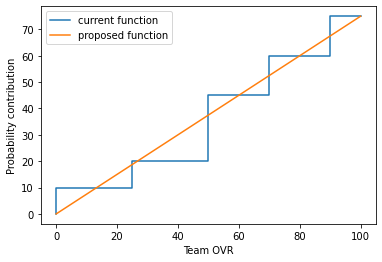

In [2]:
x = [0, 25, 50, 70, 90, 100]
y = [0, 10, 20, 45, 60, 75]

y2 = np.array(x)*0.75

def step_plot(x, y, y2, l1, l2, x_label):
    
    plt.step(x, y, where='pre', label=l1);
    if y2 is not None:
        plt.plot(x, y2, label=l2)
    
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel('Probability contribution');

def print_function(vec, name='Proposed function'):

    print(name + ' : ')
    print('Team OVR = 25, p = %d' % vec[1])
    print('Team OVR = 50, p = %d' % vec[2])
    print('Team OVR = 70, p = %d' % vec[3])
    print('Team OVR = 90, p = %d' % vec[4])
    print('Team OVR = 100, p = %d' % vec[5])

print_function(y2)  
print_function(y, 'Current function')

step_plot(x, y, y2, 
          l1='current function',
          l2='proposed function',
          x_label='Team OVR')

#### 2. Skill balance 

Notes: here the current function is less well approximated by a linear function. In this case, or other cases, we might want to use another type of function with 2+ parameters (for example a saturating or sigmodial function). This will still be simpler, in terms of the number of free parameters than fully specifying a step function.

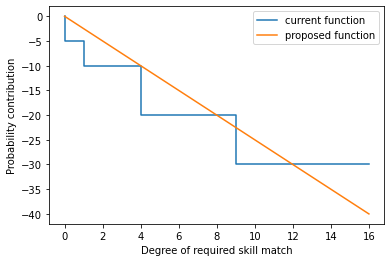

In [3]:
x = [0, 1, 4, 9, 16]
y = [0, -5, -10, -20, -30]
y2 = np.array(x)*-2.5

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed function',
          x_label='Degree of required skill match')

#### 3. Creativity match

Notes: Here it looks like a saturating function, such as the one proposed in blue, would be more appropriate. We can play around with the type of function and the parameters. **To me it seems that the key feature here is that any non-zero degree of creativity match should produce negative probabilities.** This can also be achieved using a linear function by first square-root transforming the x variable (degree of creativity match in this case).

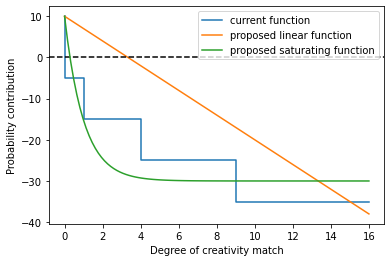

In [21]:
x = [0, 1, 4, 9, 16]
y = [10, -5, -15, -25, -35]
y2 = 10 + np.array(x)*-3.0

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed linear function',
          x_label='Degree of creativity match')

plt.axhline(0.0, linestyle='--', c='k');

x3 = np.linspace(0,16,100)
y3 = 10 - 40*(1 - np.exp(-np.array(x3))) 
plt.plot(x3, y3, label='proposed saturating function')
plt.legend();

If we want to go with a linear function we can acheive this by transforming the x-axis. Although there is not much benefit, since this line would require two parameters to define (square root + non-zero intercept). 

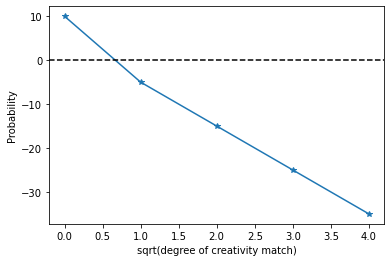

In [5]:
x = [0, 1, 4, 9, 16]
y = [10, -5, -15, -25, -35]
plt.plot(np.sqrt(x), y, '-*')
plt.axhline(0.0, linestyle='--', c='k');
plt.xlabel('sqrt(degree of creativity match)')
plt.ylabel('Probability');

#### 4. Chemistry Booster

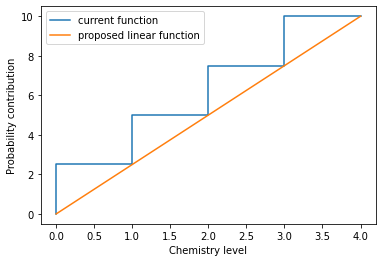

In [6]:
x = [0, 1, 2, 3, 4]
y = [0, 2.5, 5, 7.5, 10]

y2 = 2.5* np.array(x)

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed linear function',
          x_label='Chemistry level')

#### 5. Required staking

Linear looks fine, but two parameters required.

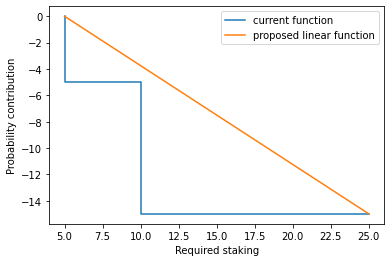

In [7]:
x = [5, 10, 25]
y = [0, -5, -15]

y2 = (15/4) -0.75* np.array(x)

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed linear function',
          x_label='Required staking')

#### [ii] Timeline flexibility

Again, there are different decay functions that we can use. The green functions below is a two-parameter exponential decay, which fits OK.

**(Note: this should be a properly normalised probability, which might mean it is easier just to hard code the vector.)**

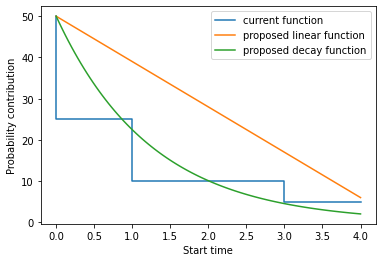

In [8]:
x = [0, 1, 2, 3, 4]
y = [50, 25, 10, 10, 5]

y2 = (50) -11* np.array(x)

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed linear function',
          x_label='Start time')

x3 = np.linspace(0,4,100)
y3 = 50*(np.exp(-0.8*np.array(x3))) 
plt.plot(x3, y3, label='proposed decay function')
plt.legend();

In [9]:
import sys
import os
MODEL_DIR = os.path.realpath(os.path.dirname('..\superscript_model'))
sys.path.append(os.path.normpath(MODEL_DIR))

In [10]:
from superscript_model.function import FunctionFactory

In [11]:
f = FunctionFactory.get('TimelineFlexibility')

In [12]:
print(f.get_values([0]))
print(f.get_values([1]))
print(f.get_values([2]))
print(f.get_values([3]))
print(f.get_values([0,1,2,3,4]))

[1.]
[1.]
[1.]
[1.]
[0.5609451  0.25204888 0.11325286 0.05088779 0.02286536]


In [13]:
np.percentile([1,2,3,4,5,6,7,8,9], [25, 50, 75])

array([3., 5., 7.])

#### [iii] Peer-to-peer skill assessment

This function models the ranking given to a worker by their team mates and the organisation.
The probability function used is dependent on the success/failure of the projec.

Note that, with standard deviation = 0.2, there is a good chance of getting decaying skill when the project is successful (and converse when project fails). 

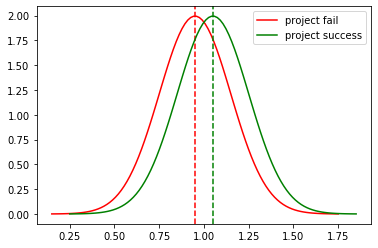

In [14]:
mu = 0.95
sigma = 0.2
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), c='r', label='project fail')
plt.axvline(mu, linestyle='--', color='r')

mu = 1.05
sigma = 0.2
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), c='g', label='project success')
plt.axvline(mu, linestyle='--', color='g')
plt.legend();

#### [iv] Update skills based on risk

This is the second step in the skill update, and only applies to skills that have been updated in [iii]. 

This may be a candidate for simplification.

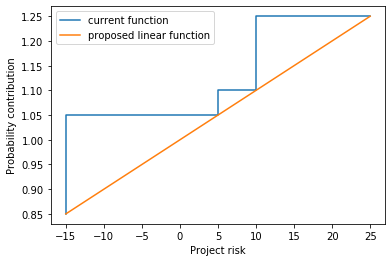

In [18]:
## Here '-15' indicates project fail, but this is not very robust. 
## Probably better to define the decay rate separatley.
x = [-15, 5, 10, 25] 
y = [0.85, 1.05, 1.1, 1.25]

y2 = 1.0 + 0.01*np.array(x)

step_plot(x, y, y2, 
          l1='current function', 
          l2='proposed linear function',
          x_label='Project risk')